#Question definition

##Data Features
* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4


##Objective

To determine if individuals have a hypothyroid condition or not.

##Metric of Success

To obtain a model that has over 95% accuracy.

##Suitability of dataset
The data was appropriate for the classification that was needed.

##Implementation design
* Data preparation
* Data analysis
* Data modeling

#Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


#Loading data

In [436]:
data=pd.read_csv('hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


#Data Preparation

In [437]:
#checking for null values
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [438]:
#checking for duplicates
data.duplicated().sum()

77

In [439]:
#checking for unique values in the different columns
for columns in data.columns:
    print('/n')
    print(data[columns].unique())

/n
['hypothyroid' 'negative']
/n
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
/n
['M' 'F' '?']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['y' 'n']
/n
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43'

In [440]:
#replacing the '?' in the sex column with the mode and confirming if it was changed
data=data.replace(['?'],np.nan)
data.sex.unique()

array(['M', 'F', nan], dtype=object)

In [0]:
#we will the replace with the mode of each and every column
for column in data.columns:
    data[column].fillna(data[column].mode()[0])


In [442]:
#converting the sex column to lowercase
data['sex']=data['sex'].str.lower()
data['sex'].head()

0    m
1    f
2    m
3    f
4    m
Name: sex, dtype: object

In [443]:
#checking the datatypes
data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [0]:
#coverting data from string to numeric
data[['age','TSH','T3','TT4','T4U','FTI']] = data[['age','TSH','T3','TT4','T4U','FTI']].apply(pd.to_numeric)

In [445]:
#confirming the change in data type
data.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

#Analysis

##Correlation

<function matplotlib.pyplot.show>

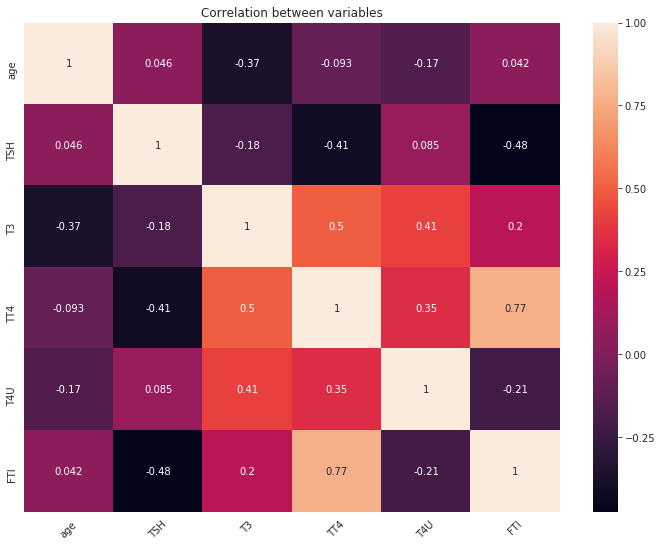

In [446]:
#checking for correlation using spearman method
plt.figure(figsize=(12,9))
cor=data.corr(method = 'spearman')
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

The variables with the highest positive correlation of 0.5 is TT4 and T3 while FTI and TSH have the stringes negative correlation of -0.48.

In [0]:

# col_names = numeric_clmns = data.dtypes[data.dtypes != "object" ].index

# sns.set_style('darkgrid')
# fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (10,10))
# fig.suptitle('Distributions of Test Features', y= 1.01, color = 'blue', fontsize = 20, weight = 'bold')

# for ax, data, point in zip(axes.flatten(), data, columns):
#   sns.distplot(data[point], ax = ax, kde = True, color = 'blue')
# plt.tight_layout()
# plt.show()

In [448]:
#Statistical description of our dataset
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


##Outliers

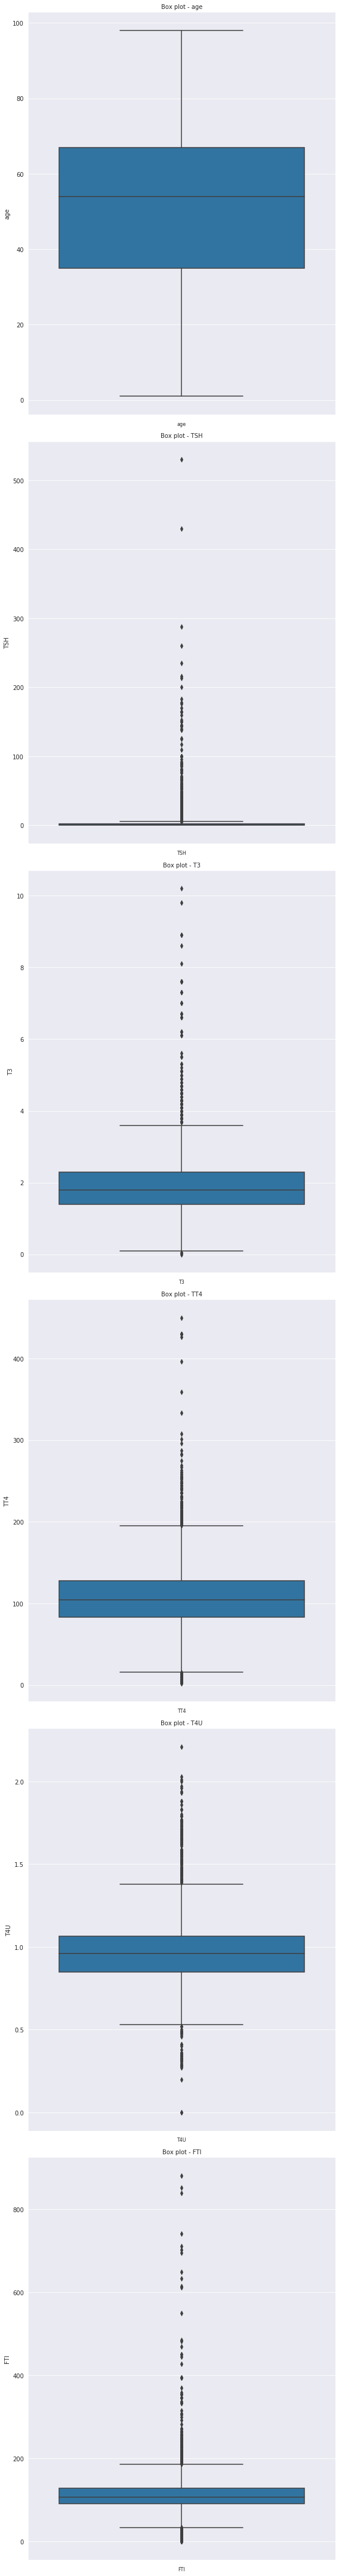

In [449]:
#checking for outliers in our dataset
col_names = numeric_clmns = data.dtypes[data.dtypes != "object" ].index

fig, ax = plt.subplots(len(col_names), figsize=(8,60))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()

All the features with numerical data other than age have outliers but we will not drop them because it would affect the integrity of our dataset.

#Modeling

###Gradient Boost

In [0]:
#Label encording our target
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data['status'] = label.fit_transform(data['status'])

target=data['status']




In [0]:
#ata['status'].head(100)

In [454]:
#Getting numerical dummies for the categorical data
columns = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
col = data[columns]
x = pd.get_dummies(col)

#checking if the transformation was successful
x.head()

,age,TSH,T3,TT4,T4U,FTI,sex_f,sex_m,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,...,TBG_19,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30
0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [455]:
x.shape

(3163, 94)

In [456]:
target.shape

(3163,)

In [0]:
 data_merged=pd.concat([x,target],axis=1)

In [458]:
data_merged.shape

(3163, 95)

In [459]:
data_merged.isna().sum()

age         446
TSH         468
T3          695
TT4         249
T4U         248
           ... 
TBG_8.50      0
TBG_80        0
TBG_86        0
TBG_9.30      0
status        0
Length: 95, dtype: int64

In [0]:
data_merged.dropna(how='any', thresh=None, subset=None, inplace=True)

In [461]:
data_merged.isna().sum()

age         0
TSH         0
T3          0
TT4         0
T4U         0
           ..
TBG_8.50    0
TBG_80      0
TBG_86      0
TBG_9.30    0
status      0
Length: 95, dtype: int64

In [462]:
data_merged.head()

,age,TSH,T3,TT4,T4U,FTI,sex_f,sex_m,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,...,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30,status
0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x = data_merged.drop('status', inplace=False,axis=1).values
y = data_merged['status']

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(x_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(x)

In [465]:
# Implementing cross validation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
classifier = []
res = []
names = []
classifier.append(('GradientBoost',  GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth= 4)))
for name, model in classifier:
 kfold = KFold(n_splits=5, random_state=0)
 cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
 res.append(cv_results)
 names.append(name)
 accuracy_message = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(accuracy_message)

GradientBoost: 0.987568 (0.005561)


#Decision tree: random forest

In [0]:
from sklearn.model_selection import train_test_split

# spliting our data into 70 percent training data and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)






In [0]:
#Importing random forest regressor and fitting the train dataset
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestClassifier(n_estimators = 100, random_state = 40, min_samples_split = 20, max_depth = 5)
rf = rf.fit(x_train, y_train)


In [0]:
#predicting our target
y_pred = rf.predict(x_test)

In [469]:
#Comparing the actual and predicted variables
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison.describe()

,Actual,Predicted
count,604.000000,604.000000
mean,0.938742,0.951987
std,0.240002,0.213971
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [470]:
#checking the accuracy of our model
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9768211920529801

Random forest model has an accuracy of 0.9768211920529801 which means our model has a good classifying power

###SVM: Linear

In [0]:

#  Split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:

#importing library and setting kernel to linear
from sklearn.svm import SVC,LinearSVC
svm_model = SVC(kernel = 'linear', random_state=0)

In [473]:
#fitting our train dataset
svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [474]:
#predicting with the test set
y_pred = svm_model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [475]:
#Checking the accuracy of model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9776674937965261

In [476]:
#Checking the performance of the model through the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,   4],
       [  5, 367]])

SVM linear model has an accuracy of 0.977667493796526 which means our model has a good classifying power

###SVM: Polynomial

In [0]:
#  Split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
#Setting the kernel to polynormial
polyclassifier = SVC(kernel = 'poly', degree = 2, gamma='auto')

In [479]:

#fitting the model into the training set
polyclassifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#predictions based on the x_test dataset
y_pred = polyclassifier.predict(x_test)

In [481]:

#obtaining accuracy score and performance based on the confusion matrix
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.9528535980148883
[[ 24   7]
 [ 12 360]]


SVM polynomial model has an accuracy of 0.9528535980148883 which means our model has a good classifying power

###SVM: RBF

In [0]:
#setting the kernel to rbf
rbf = SVC(kernel = 'rbf')

In [483]:
#fitting the training dataset
rbf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#checking predicted values
y_pred = rbf.predict(x_test)

In [485]:

#Evaluating the accuracy of our model 
print( accuracy_score(y_test, y_pred))

0.9801488833746899


SVM RBF model has an accuracy of 0.9801488833746899 which means our model has a good classifying power

#Conclusion

All the models performed well with accuracy scores of over 95% but the SVM: RBF model had the strongest classifying power of all the models with an accuracy score of 98%.